In [2]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("cases_malaysia.csv")

In [4]:
df.head()

,cases_new,cases_new.1,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,25/1/2020,4,4,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/1/2020,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/1/2020,3,3,0,7,0.0,0.0,0.0,1.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
### Let check out if there are missing value ###

df.isnull().sum()

cases_new                    0
cases_new.1                  0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                3
cases_pvax                   3
cases_fvax                   3
cases_child                  3
cases_adolescent             3
cases_adult                  3
cluster_elderly              3
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_HighRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

##### We noticed that there are several missing value and we should fix that before to carry on with the deployment ####

### Features Engeenering ###

#### Missing values ####

In [6]:
### Fill missing value ###

df['cases_cluster']=df['cases_cluster'].fillna(df['cases_cluster'].mean())
df['cases_pvax']=df['cases_pvax'].fillna(df['cases_pvax'].mean())
df['cases_fvax']=df['cases_fvax'].fillna(df['cases_fvax'].mean())
df['cases_child']=df['cases_child'].fillna(df['cases_child'].mean())
df['cases_adolescent']=df['cases_adolescent'].fillna(df['cases_adolescent'].mean())
df['cases_adult']=df['cases_adult'].fillna(df['cases_adult'].mean())
df['cluster_import']=df['cluster_import'].fillna(df['cluster_import'].mean())
df['cluster_elderly']=df['cluster_elderly'].fillna(df['cluster_elderly'].mean())
df['cluster_religious']=df['cluster_religious'].fillna(df['cluster_religious'].mean())
df['cluster_community']=df['cluster_community'].fillna(df['cluster_community'].mean())
df['cluster_HighRisk']=df['cluster_HighRisk'].fillna(df['cluster_HighRisk'].mean())
df['cluster_education']=df['cluster_education'].fillna(df['cluster_education'].mean())
df['cluster_detentionCentre']=df['cluster_detentionCentre'].fillna(df['cluster_detentionCentre'].mean())
df['cluster_workplace']=df['cluster_workplace'].fillna(df['cluster_workplace'].mean())

In [7]:
df.shape

(626, 19)

<AxesSubplot:>

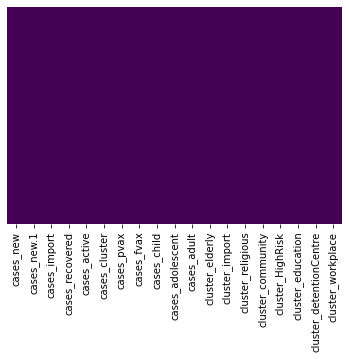

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
## After filling up the missing value by implementing fillnan and mean techniques ,
## we can observe that there are no more any missing values

df.isnull().sum()

cases_new                  0
cases_new.1                0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_pvax                 0
cases_fvax                 0
cases_child                0
cases_adolescent           0
cases_adult                0
cluster_elderly            0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_HighRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

In [10]:
df.describe()

,cases_new.1,cases_import,cases_recovered,cases_active,cases_cluster,cases_pvax,cases_fvax,cases_child,cases_adolescent,cases_adult,cluster_elderly,cluster_import,cluster_religious,cluster_community,cluster_HighRisk,cluster_education,cluster_detentionCentre,cluster_workplace
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.00000,626.000000,626.000000
mean,3748.087859,7.960064,3524.763578,43460.266773,763.189406,605.863563,577.626003,496.377207,257.956661,2561.804173,298.608347,0.461268,28.880282,249.387324,31.119718,38.65493,76.936620,776.521127
std,5860.226808,8.808178,5771.477987,70239.257797,846.957939,1584.243872,1669.879765,900.328843,448.596610,3916.999022,478.479743,2.524306,42.275363,125.800855,22.467254,48.67006,53.393376,312.972108
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.00000,0.000000,57.000000
25%,37.000000,3.000000,34.250000,851.000000,8.000000,0.000000,0.000000,1.000000,1.000000,23.000000,2.000000,0.000000,7.000000,219.750000,23.250000,17.25000,64.500000,776.521127
50%,1187.000000,5.000000,1023.500000,12743.500000,548.500000,0.000000,0.000000,90.000000,53.000000,888.500000,58.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.936620,776.521127
75%,4281.750000,10.000000,4038.750000,48120.250000,1263.000000,47.500000,22.000000,443.500000,309.500000,3032.250000,375.000000,0.461268,28.880282,249.387324,31.119718,38.65493,76.936620,776.521127
max,24599.000000,72.000000,24855.000000,263929.000000,3394.000000,7290.000000,8383.000000,5766.000000,1840.000000,16440.000000,1941.000000,54.000000,359.000000,825.000000,189.000000,501.00000,439.000000,2338.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                626 non-null    object 
 1   cases_new.1              626 non-null    int64  
 2   cases_import             626 non-null    int64  
 3   cases_recovered          626 non-null    int64  
 4   cases_active             626 non-null    int64  
 5   cases_cluster            626 non-null    float64
 6   cases_pvax               626 non-null    float64
 7   cases_fvax               626 non-null    float64
 8   cases_child              626 non-null    float64
 9   cases_adolescent         626 non-null    float64
 10  cases_adult              626 non-null    float64
 11  cluster_elderly          626 non-null    float64
 12  cluster_import           626 non-null    float64
 13  cluster_religious        626 non-null    float64
 14  cluster_community        6

#### Let analyse the progress of the new cases according to the cases and clusters categories####

In [12]:
df = df.set_index('cases_new')

In [13]:
df[['cluster_elderly']]

,cluster_elderly
cases_new,
25/1/2020,0.000000
26/1/2020,0.000000
27/1/2020,0.000000
28/1/2020,0.000000
29/1/2020,0.000000
...,...
7/10/2021,1164.000000
8/10/2021,1132.000000
9/10/2021,298.608347


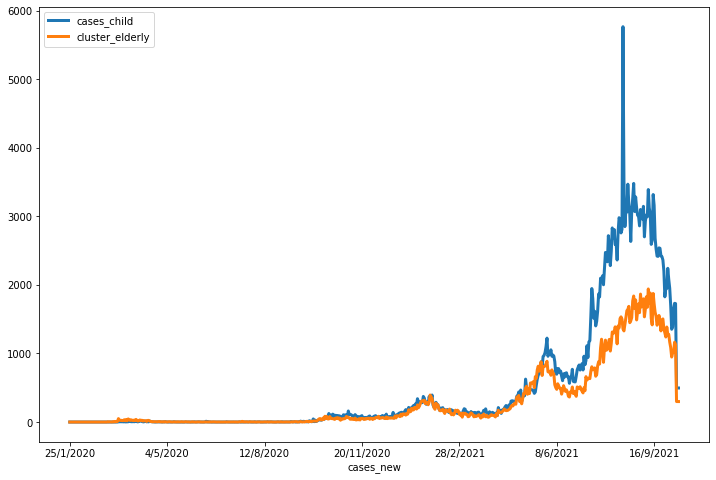

In [14]:
case = df[['cases_child','cluster_elderly']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

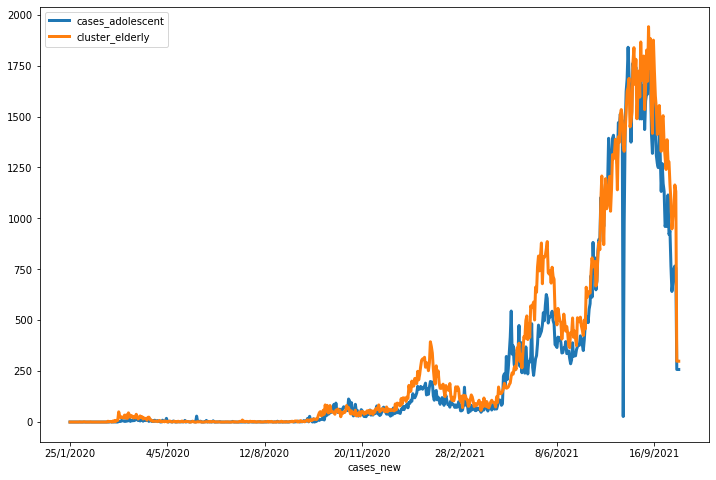

In [15]:
case = df[['cases_adolescent','cluster_elderly']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

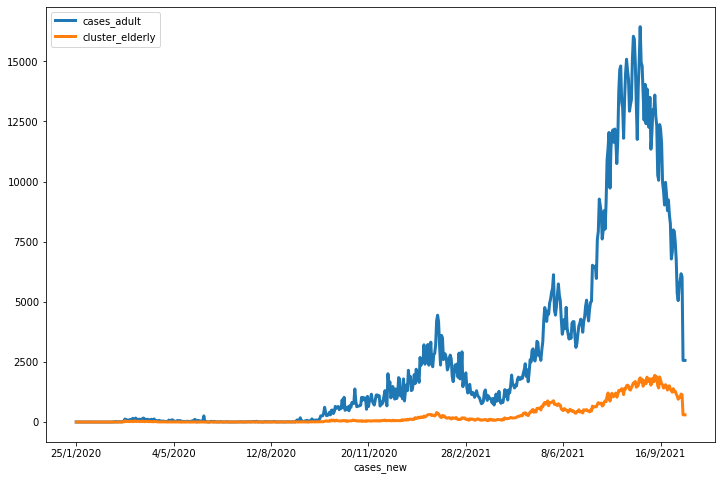

In [16]:
case = df[['cases_adult','cluster_elderly']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [17]:
### Let Analyse the import cluster regarding the new cases according to type of cases_category
df[['cluster_import']]

,cluster_import
cases_new,
25/1/2020,0.461268
26/1/2020,0.461268
27/1/2020,0.461268
28/1/2020,0.461268
29/1/2020,0.461268
...,...
7/10/2021,0.000000
8/10/2021,0.000000
9/10/2021,0.000000


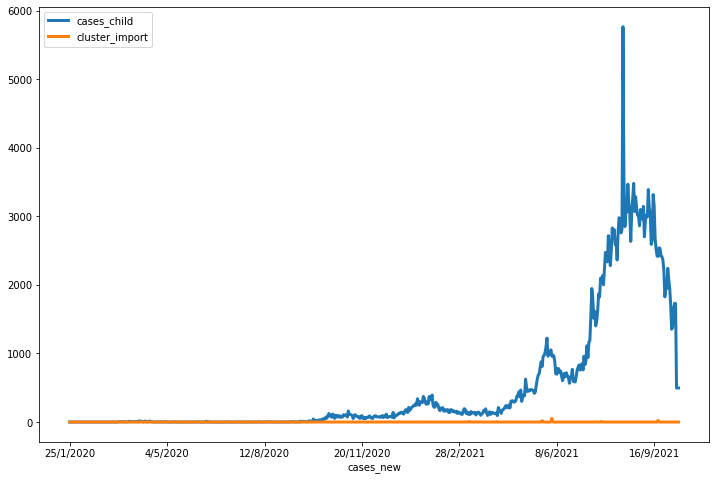

In [18]:
case = df[['cases_child','cluster_import']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

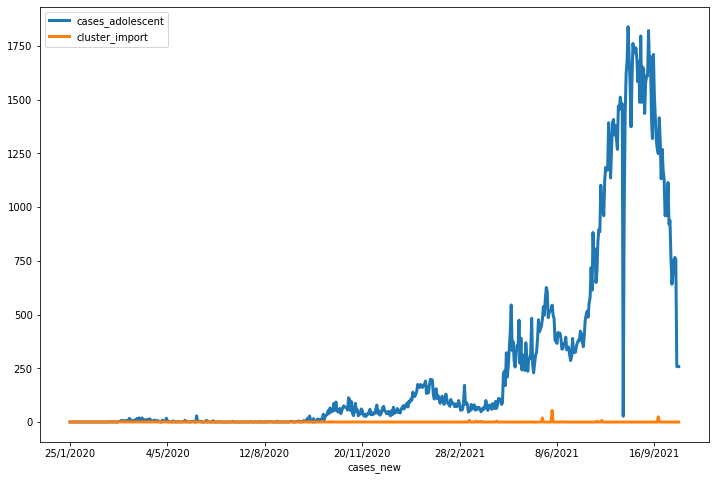

In [19]:
case = df[['cases_adolescent','cluster_import']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

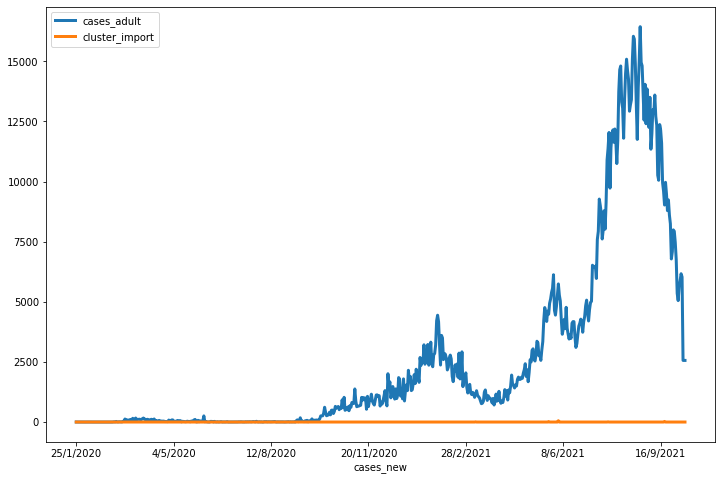

In [20]:
case = df[['cases_adult','cluster_import']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [21]:
### Let Analyse the religious cluster regarding the new cases according to type of cases_category
df[['cluster_religious']]

,cluster_religious
cases_new,
25/1/2020,28.880282
26/1/2020,28.880282
27/1/2020,28.880282
28/1/2020,28.880282
29/1/2020,28.880282
...,...
7/10/2021,0.000000
8/10/2021,0.000000
9/10/2021,0.000000


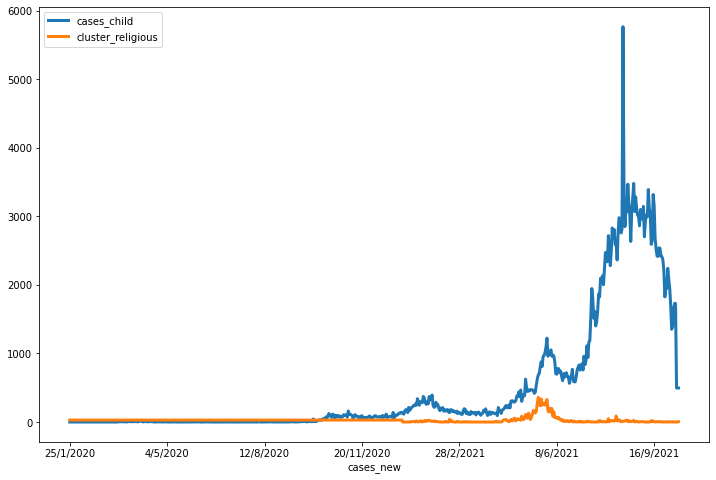

In [22]:
case = df[['cases_child','cluster_religious']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

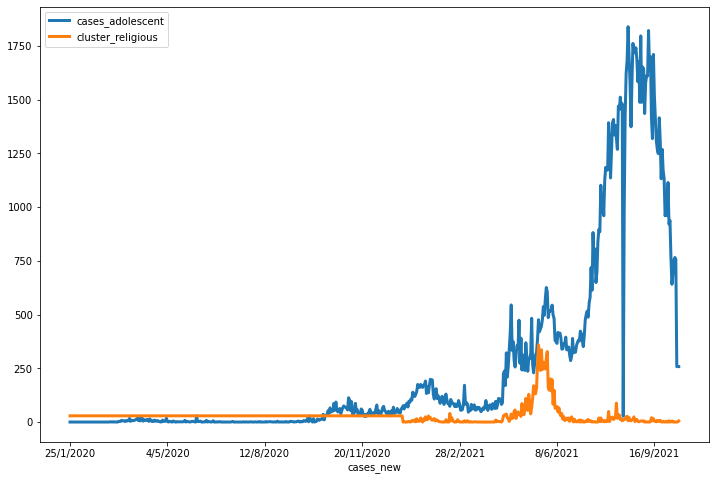

In [23]:
case = df[['cases_adolescent','cluster_religious']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

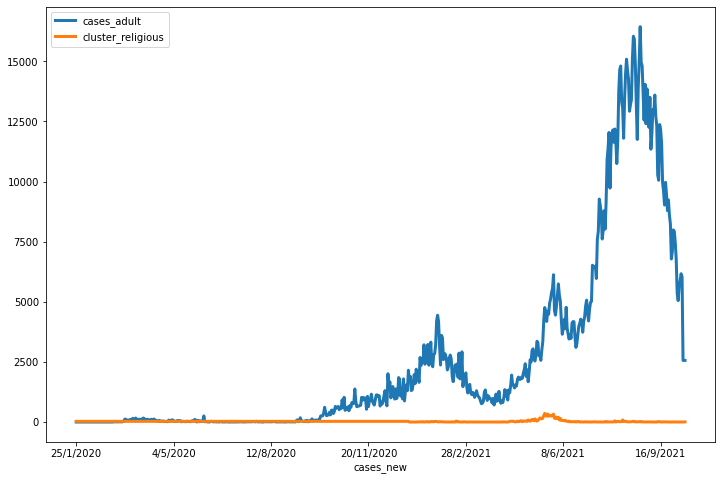

In [24]:
case = df[['cases_adult','cluster_religious']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [25]:
### Let Analyse the cluster_community regarding the new cases according to type of cases_category
df[['cluster_community']]

,cluster_community
cases_new,
25/1/2020,249.387324
26/1/2020,249.387324
27/1/2020,249.387324
28/1/2020,249.387324
29/1/2020,249.387324
...,...
7/10/2021,240.000000
8/10/2021,157.000000
9/10/2021,271.000000


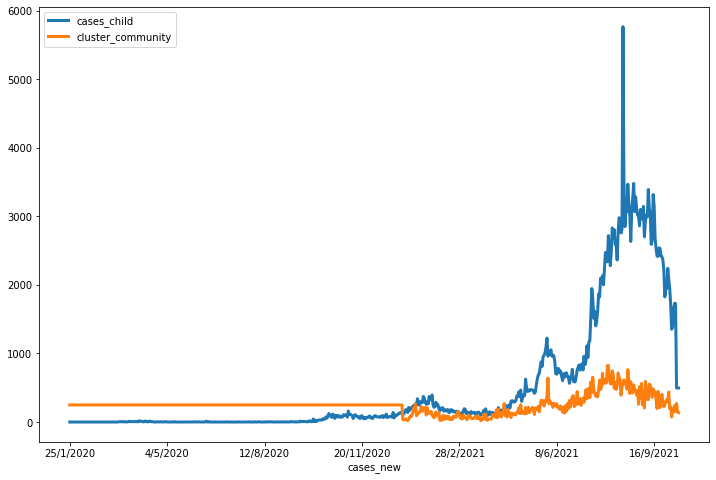

In [26]:
case = df[['cases_child','cluster_community']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

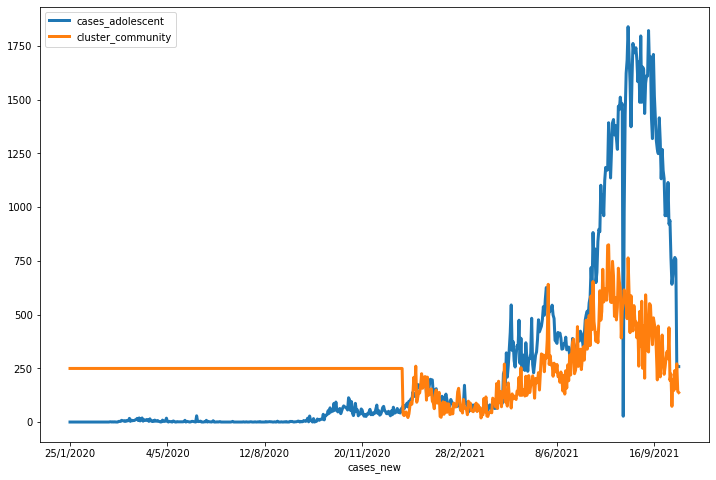

In [27]:
case = df[['cases_adolescent','cluster_community']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

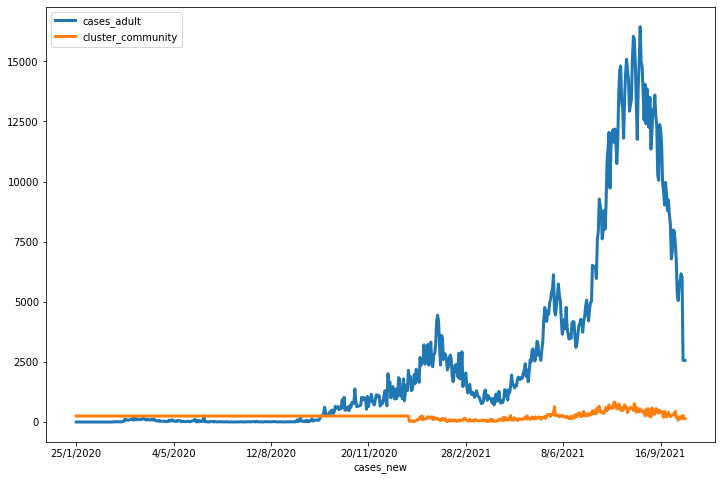

In [28]:
case = df[['cases_adult','cluster_community']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [29]:
### Let Analyse the  cluster_HighRisk  regarding the new cases according to type of cases_category
df[['cluster_HighRisk']]

,cluster_HighRisk
cases_new,
25/1/2020,31.119718
26/1/2020,31.119718
27/1/2020,31.119718
28/1/2020,31.119718
29/1/2020,31.119718
...,...
7/10/2021,111.000000
8/10/2021,17.000000
9/10/2021,105.000000


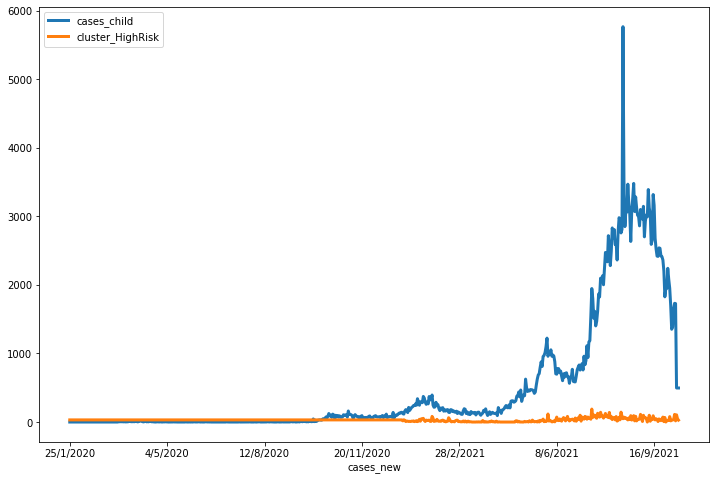

In [30]:
case = df[['cases_child','cluster_HighRisk']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

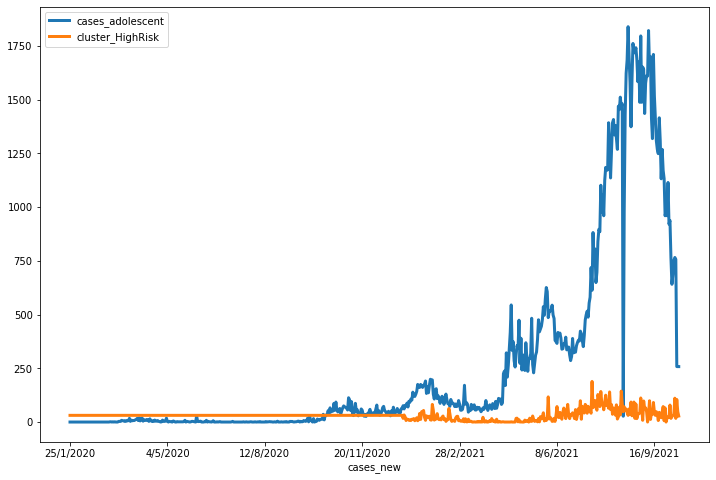

In [31]:

case = df[['cases_adolescent','cluster_HighRisk']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

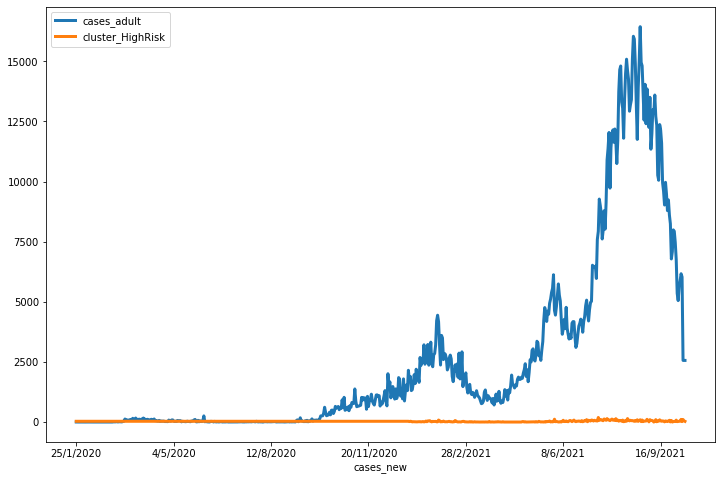

In [32]:
case = df[['cases_adult','cluster_HighRisk']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [33]:
### Let Analyse the   cluster_education   regarding the new cases according to type of cases_category
df[['cluster_education']]

,cluster_education
cases_new,
25/1/2020,38.65493
26/1/2020,38.65493
27/1/2020,38.65493
28/1/2020,38.65493
29/1/2020,38.65493
...,...
7/10/2021,41.00000
8/10/2021,16.00000
9/10/2021,42.00000


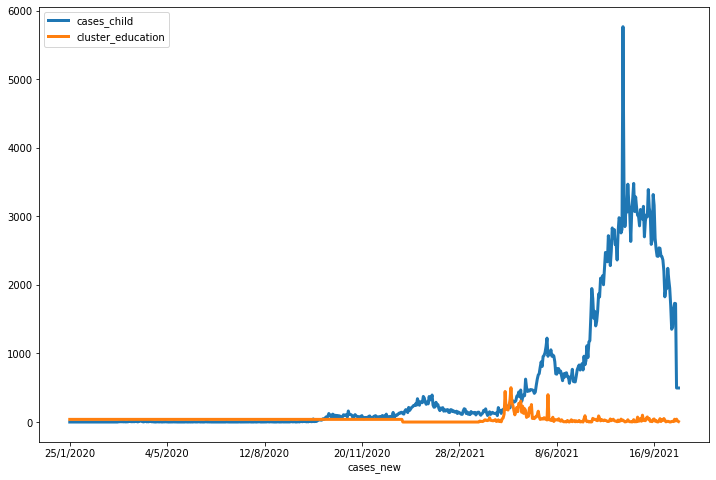

In [34]:
case = df[['cases_child','cluster_education']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

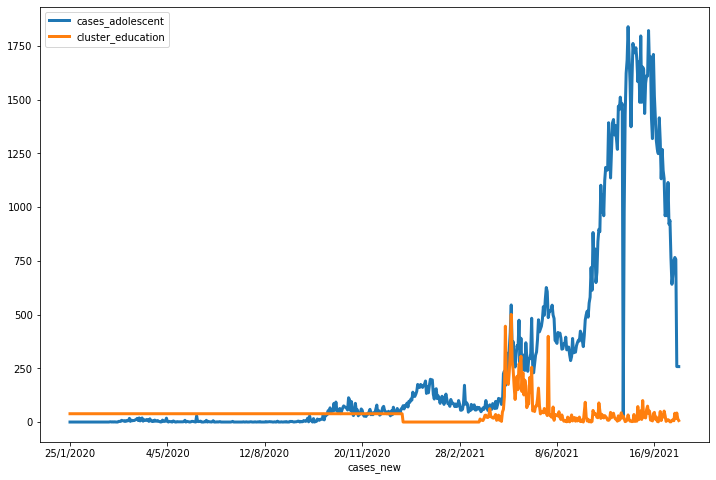

In [35]:
case = df[['cases_adolescent','cluster_education']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

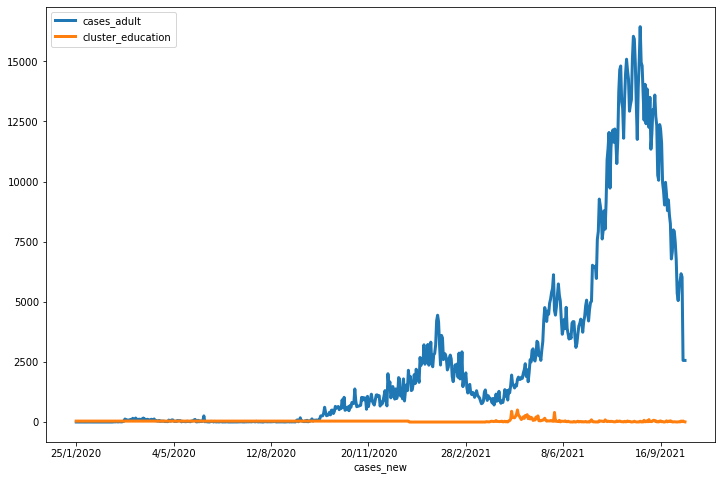

In [36]:
case = df[['cases_adult','cluster_education']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [37]:
### Let Analyse the   cluster_detentionCentre   regarding the new cases according to type of cases_category
df[['cluster_detentionCentre']]

,cluster_detentionCentre
cases_new,
25/1/2020,76.93662
26/1/2020,76.93662
27/1/2020,76.93662
28/1/2020,76.93662
29/1/2020,76.93662
...,...
7/10/2021,5.00000
8/10/2021,8.00000
9/10/2021,0.00000


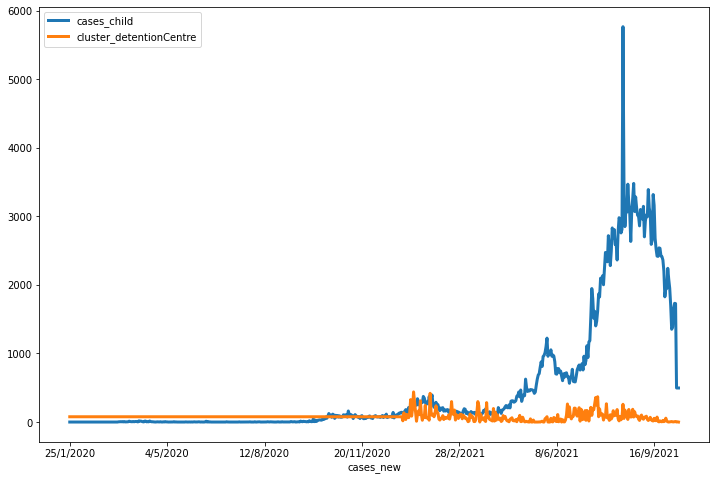

In [38]:
case = df[['cases_child','cluster_detentionCentre']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

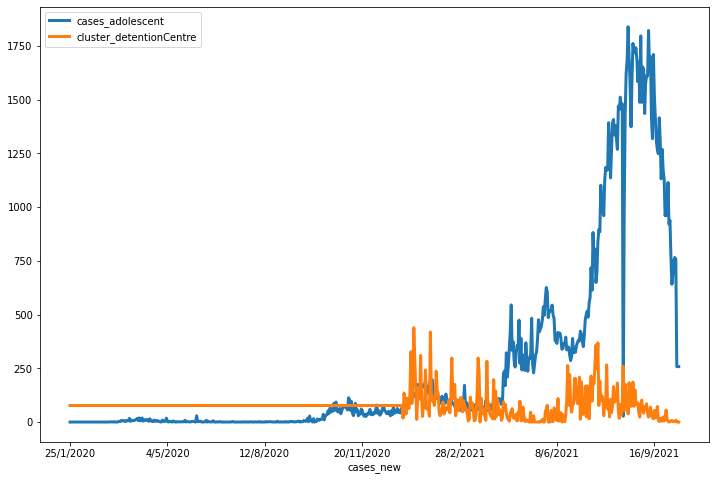

In [39]:
case = df[['cases_adolescent','cluster_detentionCentre']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

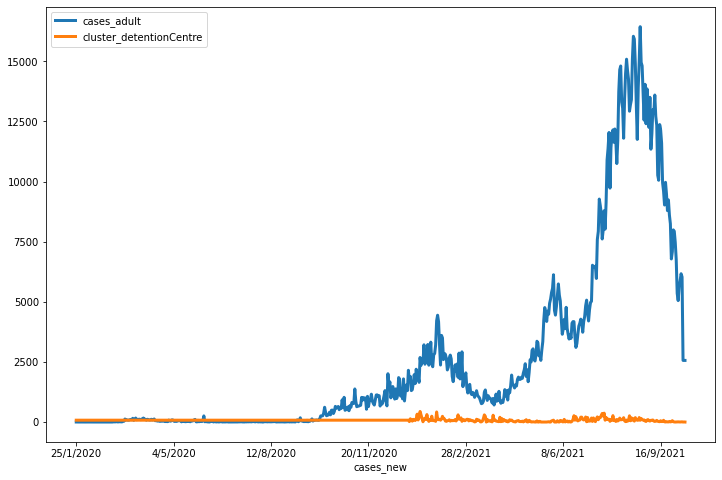

In [40]:
case = df[['cases_adult','cluster_detentionCentre']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [41]:
### Let Analyse cluster_workplace regarding  new cases according to type of cases_category
df[['cluster_workplace']]

,cluster_workplace
cases_new,
25/1/2020,776.521127
26/1/2020,776.521127
27/1/2020,776.521127
28/1/2020,776.521127
29/1/2020,776.521127
...,...
7/10/2021,300.000000
8/10/2021,184.000000
9/10/2021,203.000000


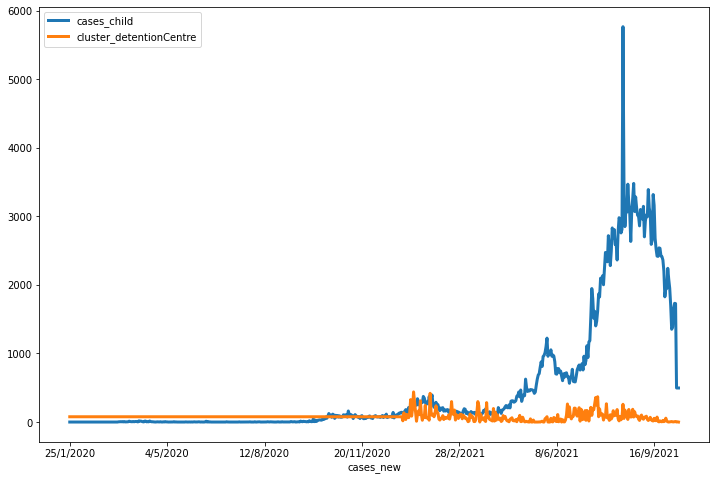

In [42]:
case = df[['cases_child','cluster_detentionCentre']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

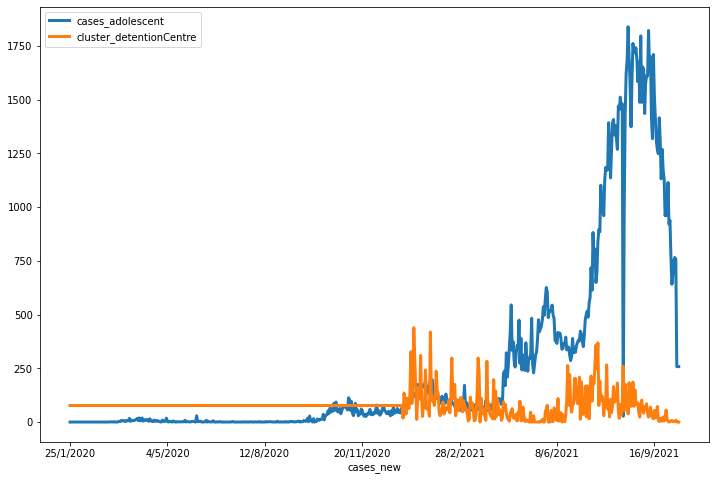

In [43]:
case = df[['cases_adolescent','cluster_detentionCentre']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

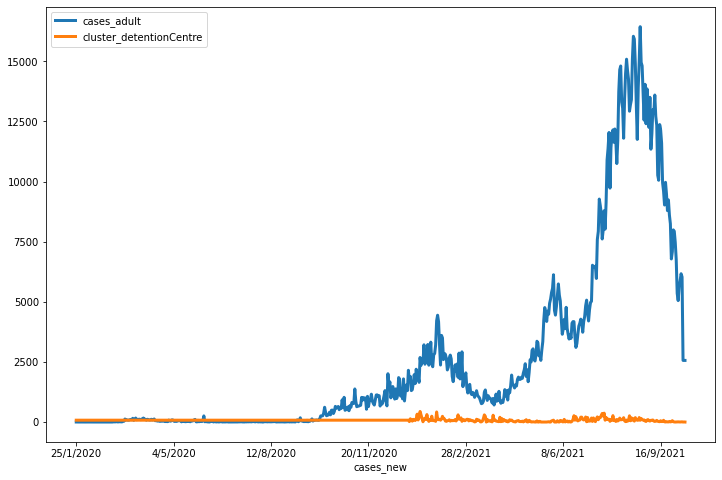

In [44]:
case = df[['cases_adult','cluster_detentionCentre']]
case.plot(figsize=(12,8), linewidth=3, legend=True)

plt.show()

In [45]:
X=df.iloc[:,[3,17]].values

#### Using the elbow method to find the optimal number of clusters ####

In [46]:
from sklearn.cluster import KMeans

In [47]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


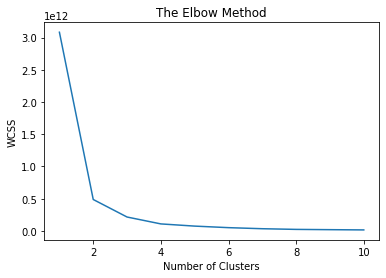

In [48]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Fitting K-MEans to the dataset ####

In [49]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

#### Visualize the clusters ####

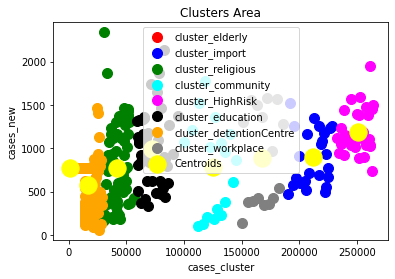

In [54]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster_elderly')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster_import')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster_religious')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='cluster_community ')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='cluster_HighRisk')
plt.scatter(X[y_kmeans==5,0],X[y_kmeans==5,1],s=100,c='black',label='cluster_education')
plt.scatter(X[y_kmeans==6,0],X[y_kmeans==6,1],s=100,c='orange',label='cluster_detentionCentre')
plt.scatter(X[y_kmeans==7,0],X[y_kmeans==7,1],s=100,c='grey',label='cluster_workplace')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')


plt.title('Clusters Area')
plt.xlabel('cases_cluster')
plt.ylabel('cases_new')
plt.legend()
plt.show()


         

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [52]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)